In [44]:
import pandas as pd
import numpy as np
import json
import requests
import math
import warnings
warnings.filterwarnings('ignore')

### STEP 0 Data Acquisition

In [98]:
COUNTY_NAME = 'Mecklenburg'
STATE_NAME = 'North Carolina'
STATE_NAME_SHORT = 'NC'
COUNTY_FIPS_CODE = 37119
COUNTY_POPULATION = 1115482

### Read Raw Data

In [76]:
covid_confirmed_cases = pd.read_csv('CONVENIENT_us_confirmed_cases.csv', header=[0,1])
covid_confirmed_cases.head()

Province_State Alabama                                                     \
          Admin2 Autauga Baldwin Barbour Bibb Blount Bullock Butler Calhoun   
0        1/23/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
1        1/24/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
2        1/25/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
3        1/26/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
4        1/27/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   

            ... Wyoming                                                  \
  Chambers  ...    Park Platte Sheridan Sublette Sweetwater Teton Uinta   
0      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
1      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
2      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
3      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
4      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   

                              
  Unassigned Washakie Weston  
0        0.0      0.0    0.0  
1        0.0      0.0    0.0  
2        0.0      0.0    0.0  
3        0.0      0.0    0.0  
4        0.0      0.0    0.0  

[5 rows x 3343 columns]

In [77]:
covid_confirmed_deaths = pd.read_csv('CONVENIENT_us_deaths.csv', header=[0,1])
covid_confirmed_deaths.head()

Province_State Alabama                                                     \
          Admin2 Autauga Baldwin Barbour Bibb Blount Bullock Butler Calhoun   
0        1/23/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
1        1/24/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
2        1/25/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
3        1/26/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   
4        1/27/20     0.0     0.0     0.0  0.0    0.0     0.0    0.0     0.0   

            ... Wyoming                                                  \
  Chambers  ...    Park Platte Sheridan Sublette Sweetwater Teton Uinta   
0      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
1      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
2      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
3      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   
4      0.0  ...     0.0    0.0      0.0      0.0        0.0   0.0   0.0   

                              
  Unassigned Washakie Weston  
0        0.0      0.0    0.0  
1        0.0      0.0    0.0  
2        0.0      0.0    0.0  
3        0.0      0.0    0.0  
4        0.0      0.0    0.0  

[5 rows x 3343 columns]

### Data Processing and Cleaning

In [100]:
# Extract confirmed cases for NC State
confirmed_cases_nc = pd.DataFrame((covid_confirmed_cases['Province_State']['Admin2']).copy())
confirmed_cases_nc['Cases'] = (covid_confirmed_cases[STATE_NAME][COUNTY_NAME]).copy()

#rename column admin2 to Date
confirmed_cases_nc.rename(columns={"Admin2": "Date"},inplace=True)

# Parse the date col to date type
confirmed_cases_nc['Date'] = pd.to_datetime(confirmed_cases_nc['Date'])

confirmed_cases_nc = confirmed_cases_nc[(confirmed_cases_nc['Date'] >= '2020-02-01') & (confirmed_cases_nc['Date'] <= '2021-10-15')]
confirmed_cases_nc['Moving Average Cases'] = confirmed_cases_nc.rolling(window=7).mean().round()
confirmed_cases_nc['Cumulative Cases'] = confirmed_cases_nc['Cases'].cumsum()

confirmed_cases_nc.head()

,Date,Cases,Moving Average Cases,Cumulative Cases
9,2020-02-01,0.0,NaN,0.0
10,2020-02-02,0.0,NaN,0.0
11,2020-02-03,0.0,NaN,0.0
12,2020-02-04,0.0,NaN,0.0
13,2020-02-05,0.0,NaN,0.0


In [102]:
# Extract death cases for NC State
confirmed_death_nc = pd.DataFrame((covid_confirmed_deaths['Province_State']['Admin2']).copy())
confirmed_death_nc['Deaths'] = (covid_confirmed_deaths[STATE_NAME][COUNTY_NAME]).copy()

#rename column admin2 to Date
confirmed_death_nc.rename(columns={"Admin2": "Date"},inplace=True)

# Parse the date col to date type
confirmed_death_nc['Date'] = pd.to_datetime(confirmed_cases_nc['Date'])

confirmed_death_nc = confirmed_death_nc[(confirmed_death_nc['Date'] >= '2020-02-01') & (confirmed_death_nc['Date'] <= '2021-10-15')]
confirmed_death_nc['Moving Average Deaths'] = confirmed_death_nc.rolling(window=7).mean().round()
confirmed_death_nc['Cumulative Deaths'] = confirmed_death_nc['Deaths'].cumsum()


confirmed_death_nc.head()

,Date,Deaths,Moving Average Deaths,Cumulative Deaths
9,2020-02-01,0.0,NaN,0.0
10,2020-02-02,0.0,NaN,0.0
11,2020-02-03,0.0,NaN,0.0
12,2020-02-04,0.0,NaN,0.0
13,2020-02-05,0.0,NaN,0.0


### STEP 1 Analysis

In [111]:
nc_cases_merged = pd.merge(confirmed_cases_nc, confirmed_death_nc, how='left', on='Date')

#inital population of the county
nc_cases_merged['Initial Population'] = COUNTY_POPULATION
#population at risk = population - cases - deaths
nc_cases_merged['Population at Risk'] = nc_cases_merged['Initial Population'] - nc_cases_merged['Cumulative Cases'] - nc_cases_merged['Cumulative Deaths']
#rate of infection = moving average case/population at risk
nc_cases_merged['Rate of Infection'] = (nc_cases_merged['Moving Average Cases']/nc_cases_merged['Population at Risk']) * 100
#rate of daily infection 
nc_cases_merged['Rate of Daily Infection'] = (nc_cases_merged['Cases']/nc_cases_merged['Population at Risk']) * 100
#rate of cases
nc_cases_merged['Rate of Cases'] = (nc_cases_merged['Moving Average Cases'].diff()/COUNTY_POPULATION) * 100
#rate of daily cases
nc_cases_merged['Rate of Daily Cases'] = (nc_cases_merged['Cases'].diff()/COUNTY_POPULATION) * 100
nc_cases_merged.tail()

,Date,Cases,Moving Average Cases,Cumulative Cases,Deaths,Moving Average Deaths,Cumulative Deaths,Initial Population,Population at Risk,Rate of Infection,Rate of Daily Infection,Rate of Cases,Rate of Daily Cases
618,2021-10-11,682.0,285.0,153765.0,4.0,4.0,1192.0,1115482,960525.0,0.029671,0.071003,-0.003138,0.061139
619,2021-10-12,206.0,264.0,153971.0,0.0,4.0,1192.0,1115482,960319.0,0.027491,0.021451,-0.001883,-0.042672
620,2021-10-13,235.0,253.0,154206.0,12.0,4.0,1204.0,1115482,960072.0,0.026352,0.024477,-0.000986,0.002600
621,2021-10-14,229.0,248.0,154435.0,1.0,3.0,1205.0,1115482,959842.0,0.025838,0.023858,-0.000448,-0.000538
622,2021-10-15,283.0,234.0,154718.0,6.0,3.0,1211.0,1115482,959553.0,0.024386,0.029493,-0.001255,0.004841


### STEP 2 Visualizations

In [63]:
import matplotlib.pyplot as plt  
from matplotlib.pyplot import figure

### GRAPH 1 Daily Cases

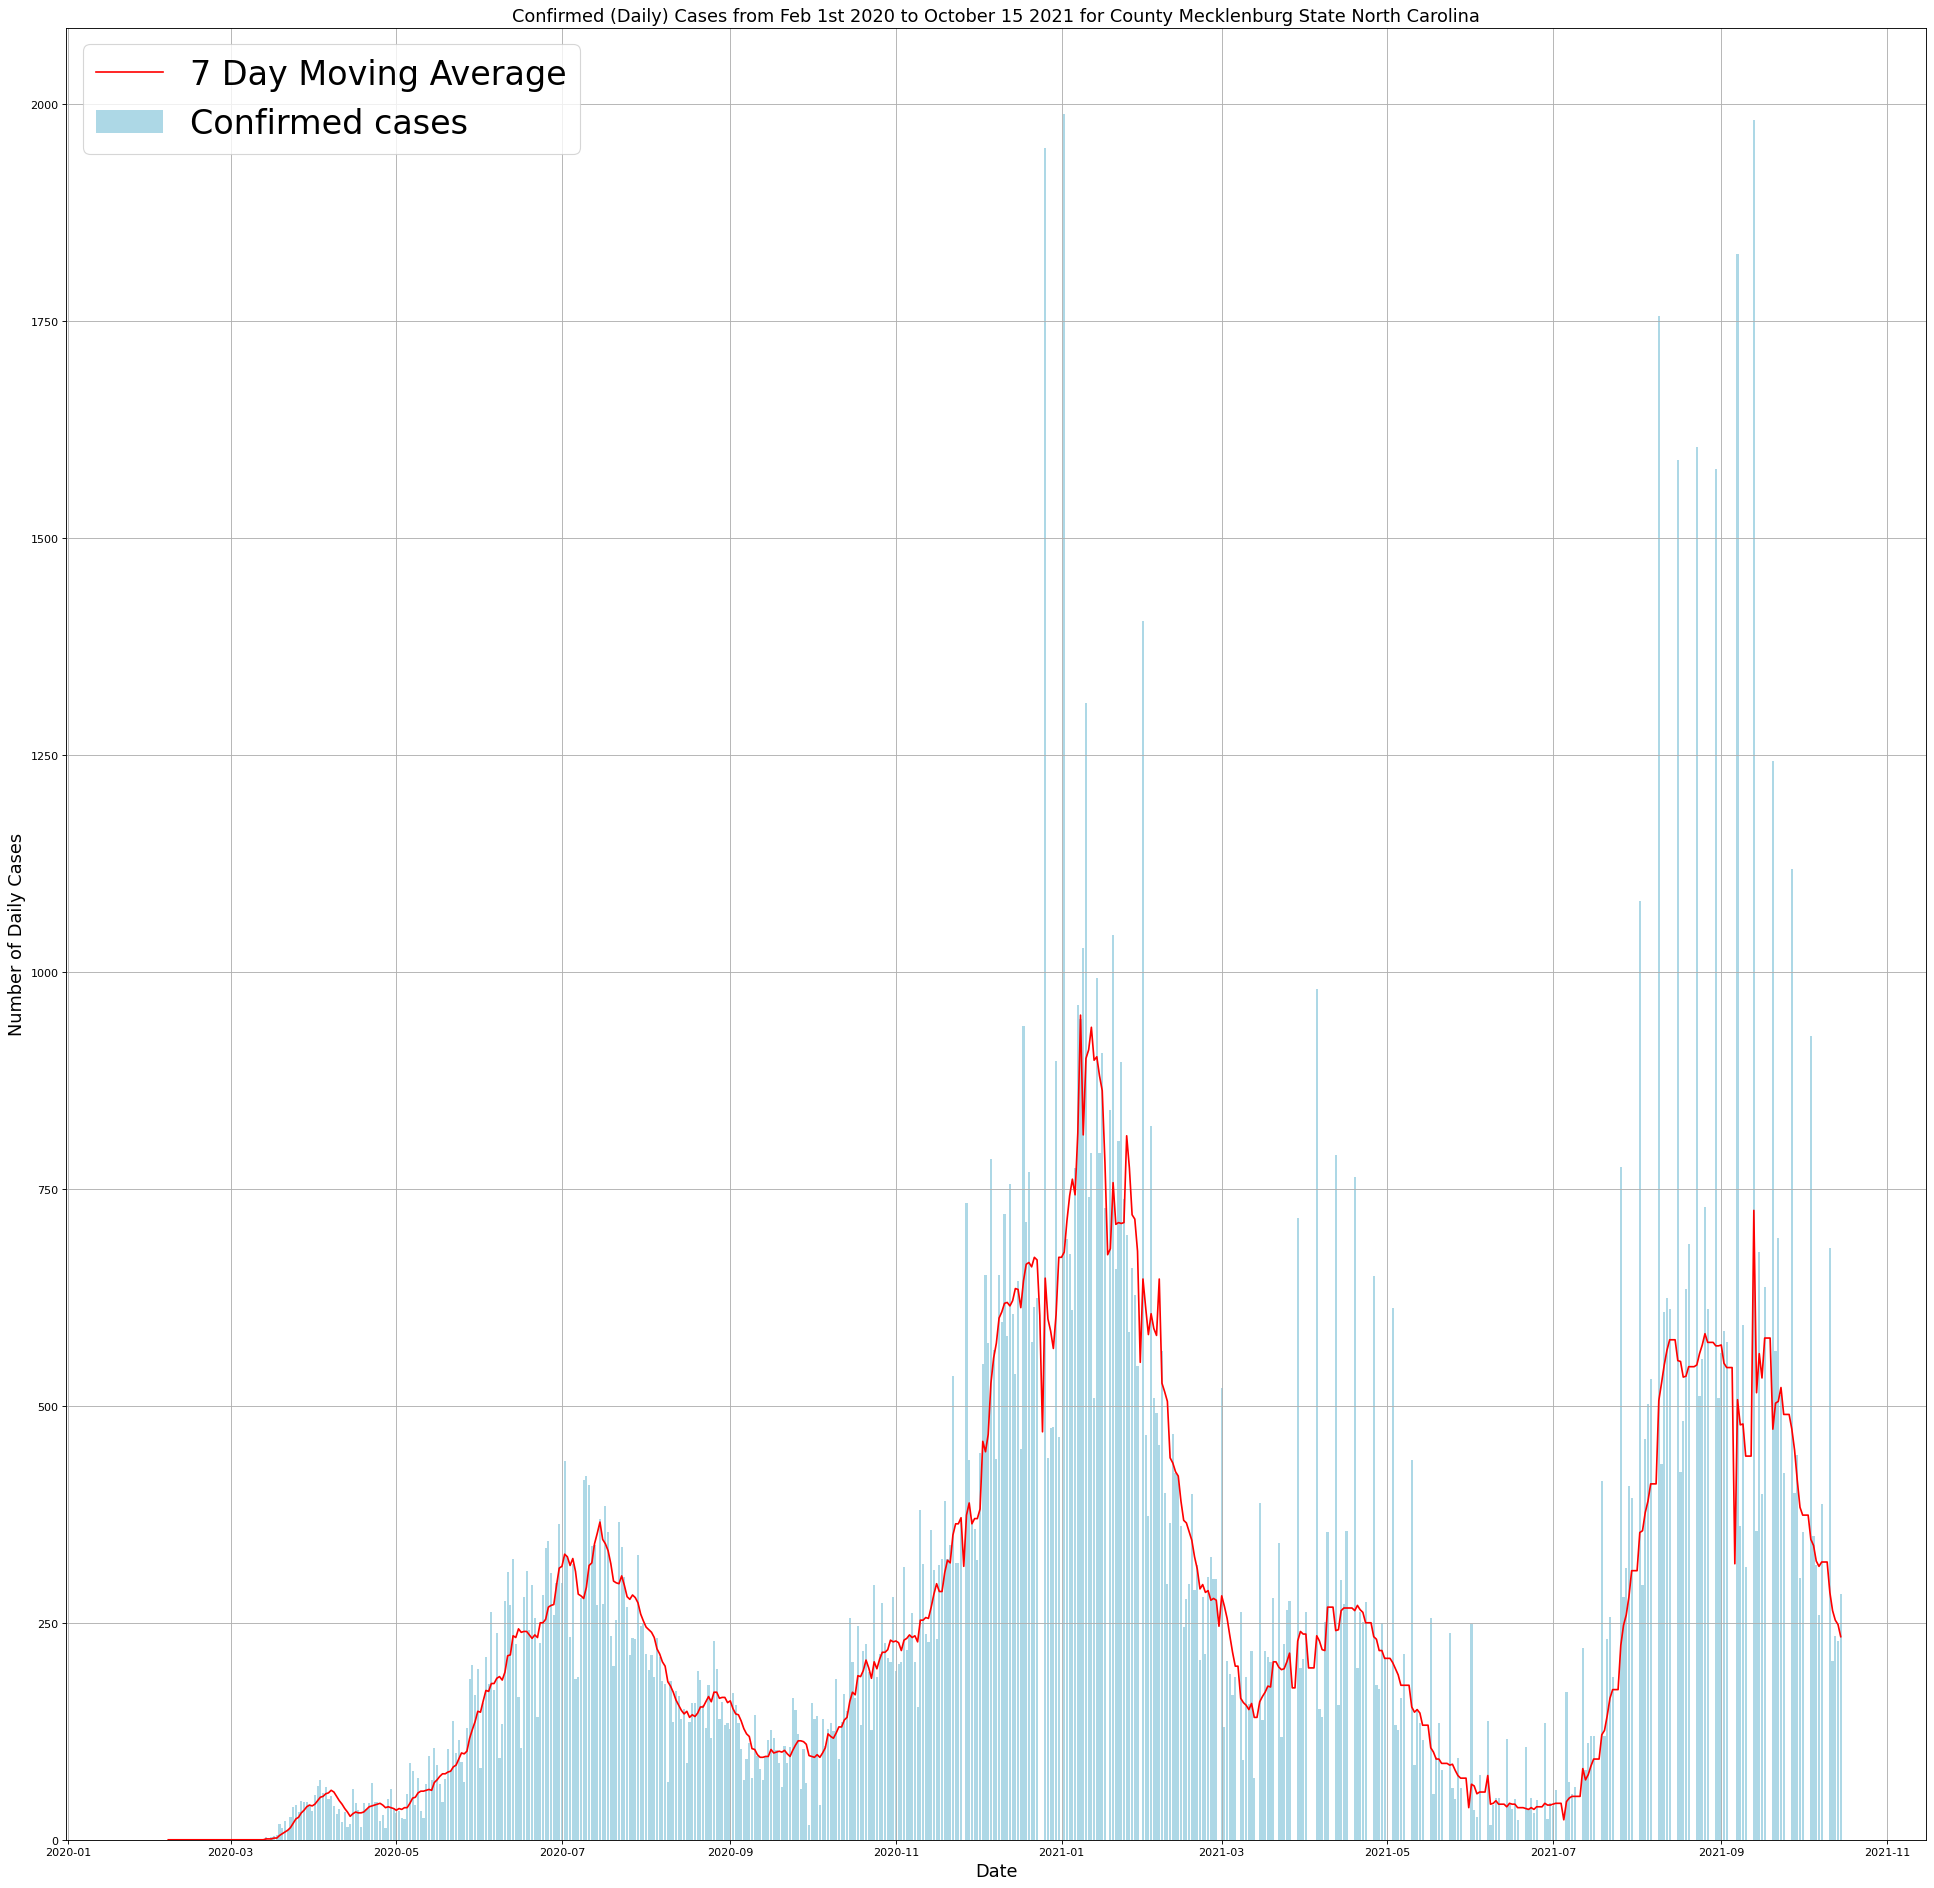

In [139]:
figure(figsize=(30, 30), dpi=80)

plt.grid(True)
plt.bar(nc_cases_merged['Date'], nc_cases_merged['Cases'], color='lightblue', label='Confirmed cases')
plt.plot(nc_cases_merged['Date'], nc_cases_merged['Moving Average Cases'], color='red', label='7 Day Moving Average')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Daily Cases', fontsize=16)
plt.title('Confirmed (Daily) Cases from Feb 1st 2020 to October 15 2021 for County Mecklenburg State North Carolina', fontsize=16)

plt.savefig('Daily_Cases_Mecklenburg_North_Carolina.jpeg')
plt.legend(loc=2, fontsize=30)


### Graph 2 Daily Deaths

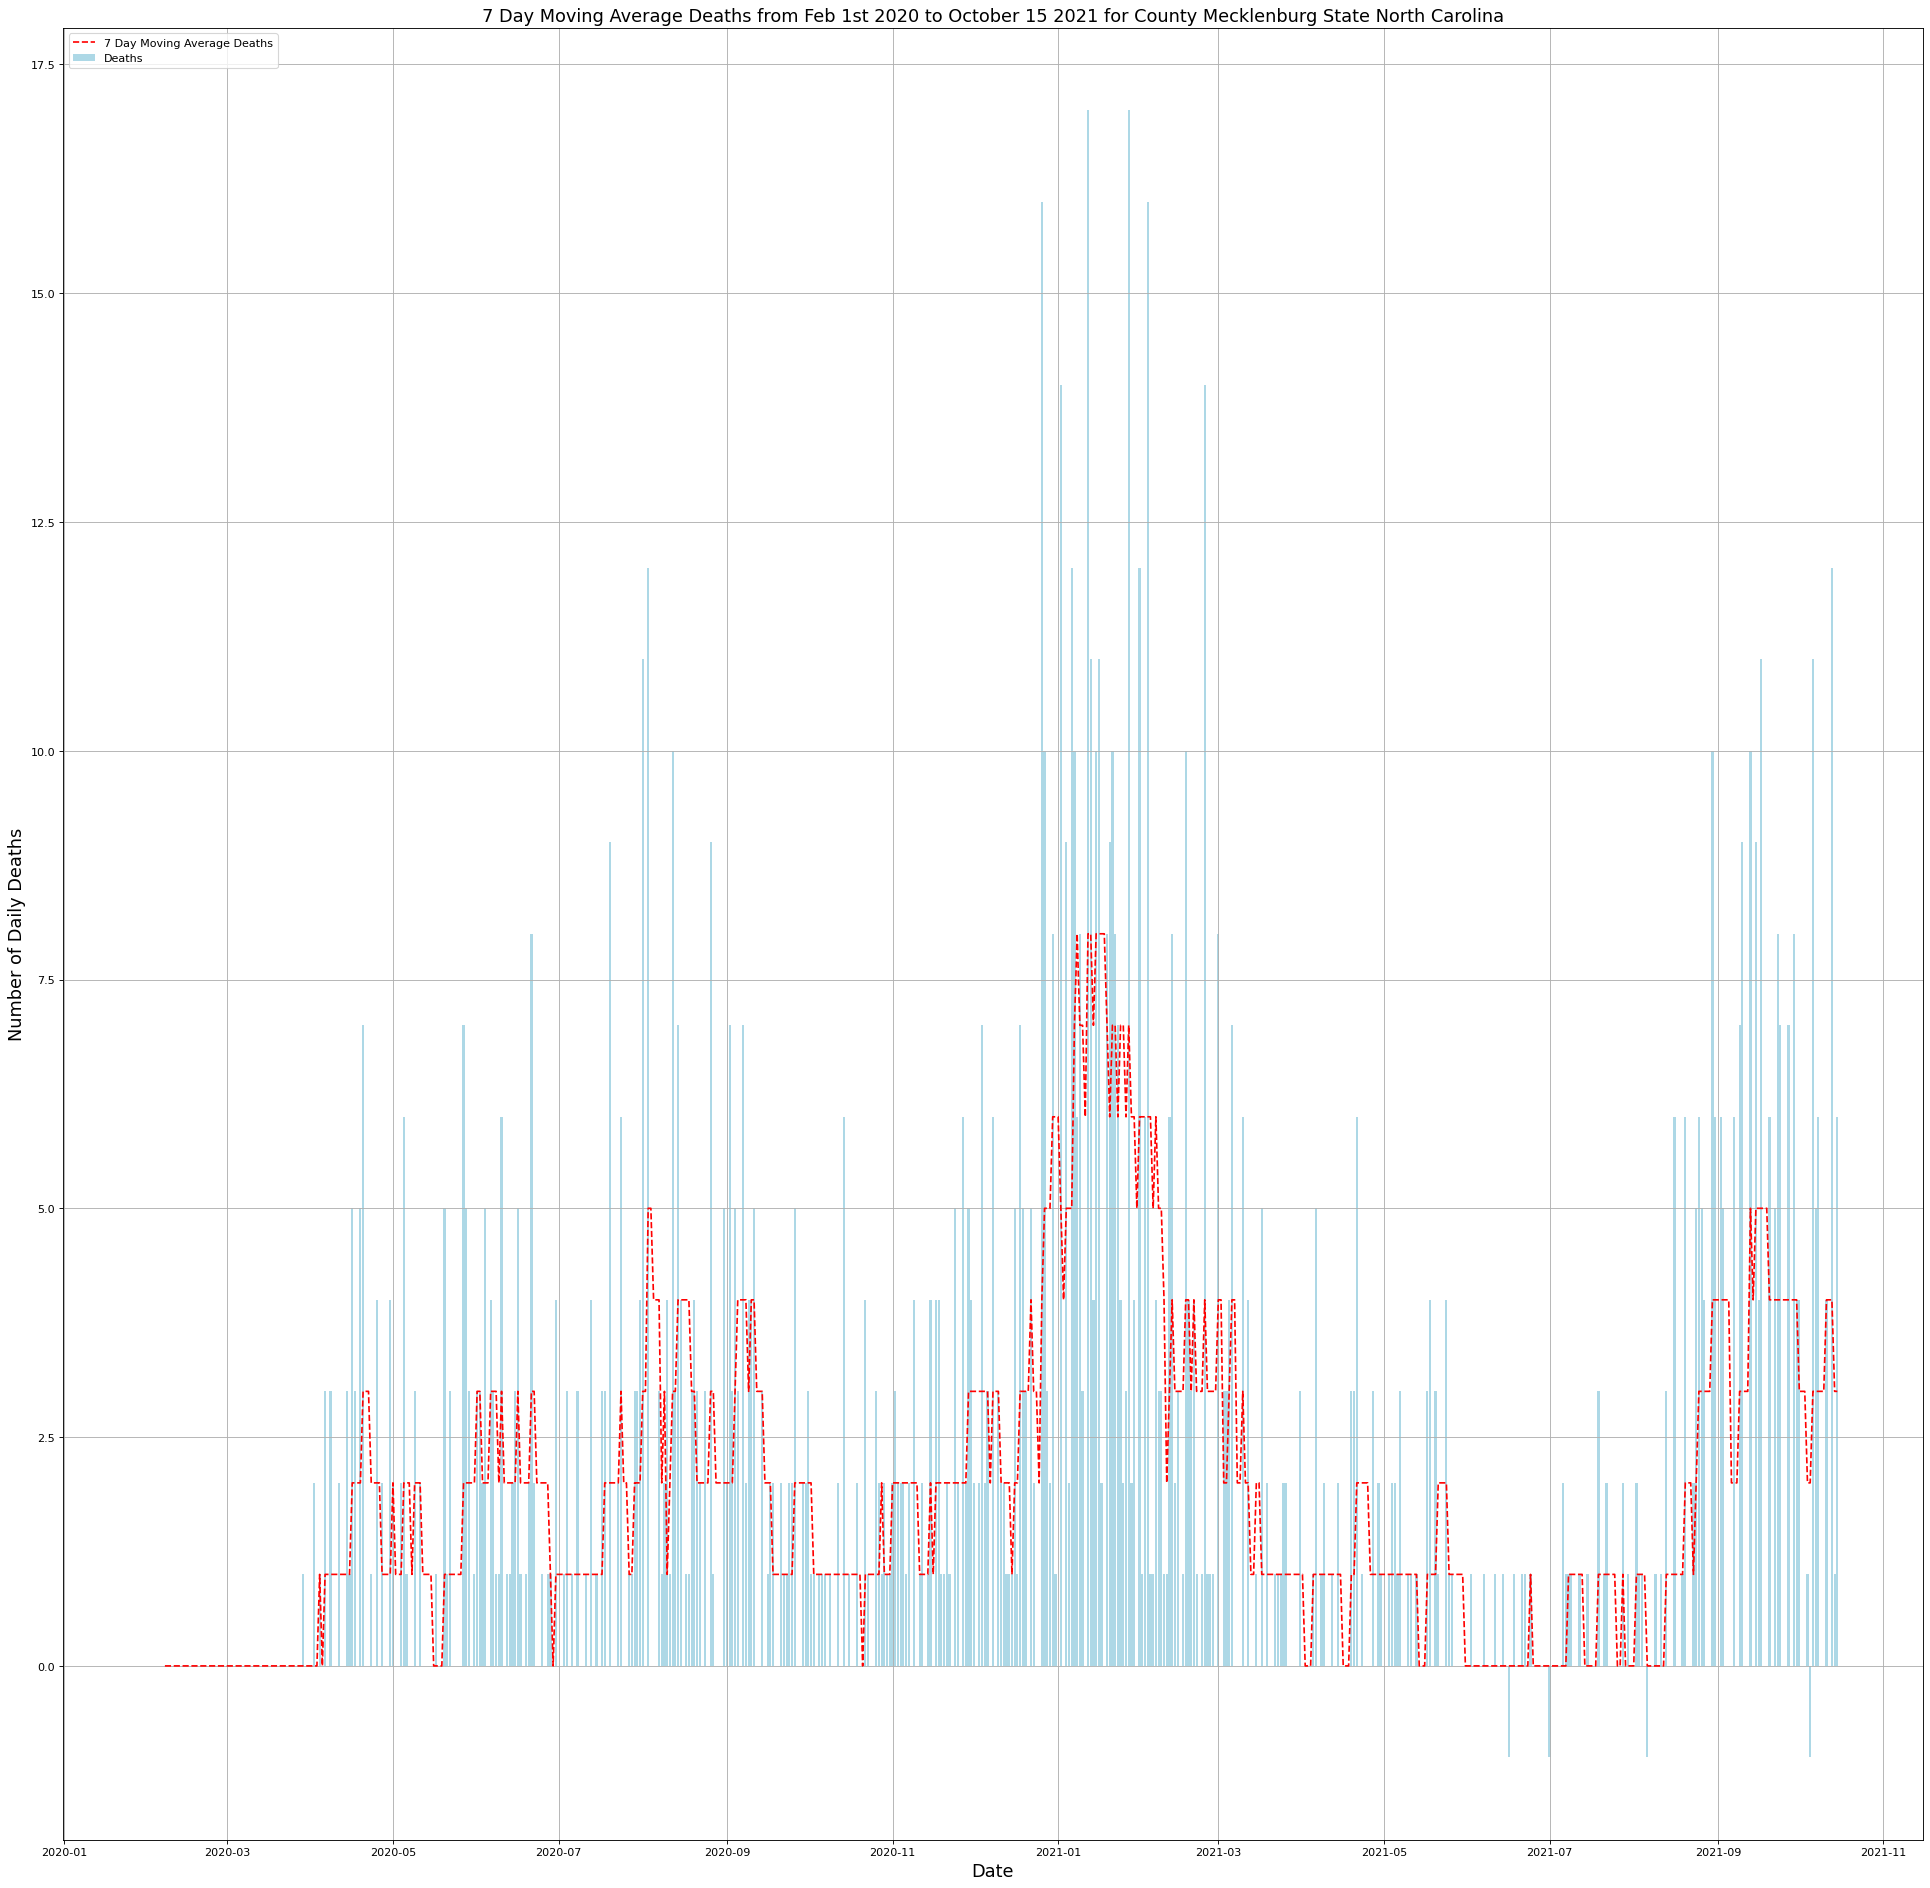

In [140]:
figure(figsize=(30, 30), dpi=80)

plt.grid(True)
plt.bar(nc_cases_merged['Date'], nc_cases_merged['Deaths'], color='lightblue', label='Deaths')
plt.plot(nc_cases_merged['Date'], nc_cases_merged['Moving Average Deaths'], color='red', linestyle="--", label='7 Day Moving Average Deaths')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Daily Deaths', fontsize=16)
plt.title('7 Day Moving Average Deaths from Feb 1st 2020 to October 15 2021 for County Mecklenburg State North Carolina', fontsize=16)

plt.savefig('7Day_Average_Deaths_Mecklenburg_North_Carolina.jpeg')
plt.legend(loc=2)

### Graph 3 Cumulative Cases & Deaths

Text(2200.347222222222, 0.5, 'Confirmed Cumulative Deaths')

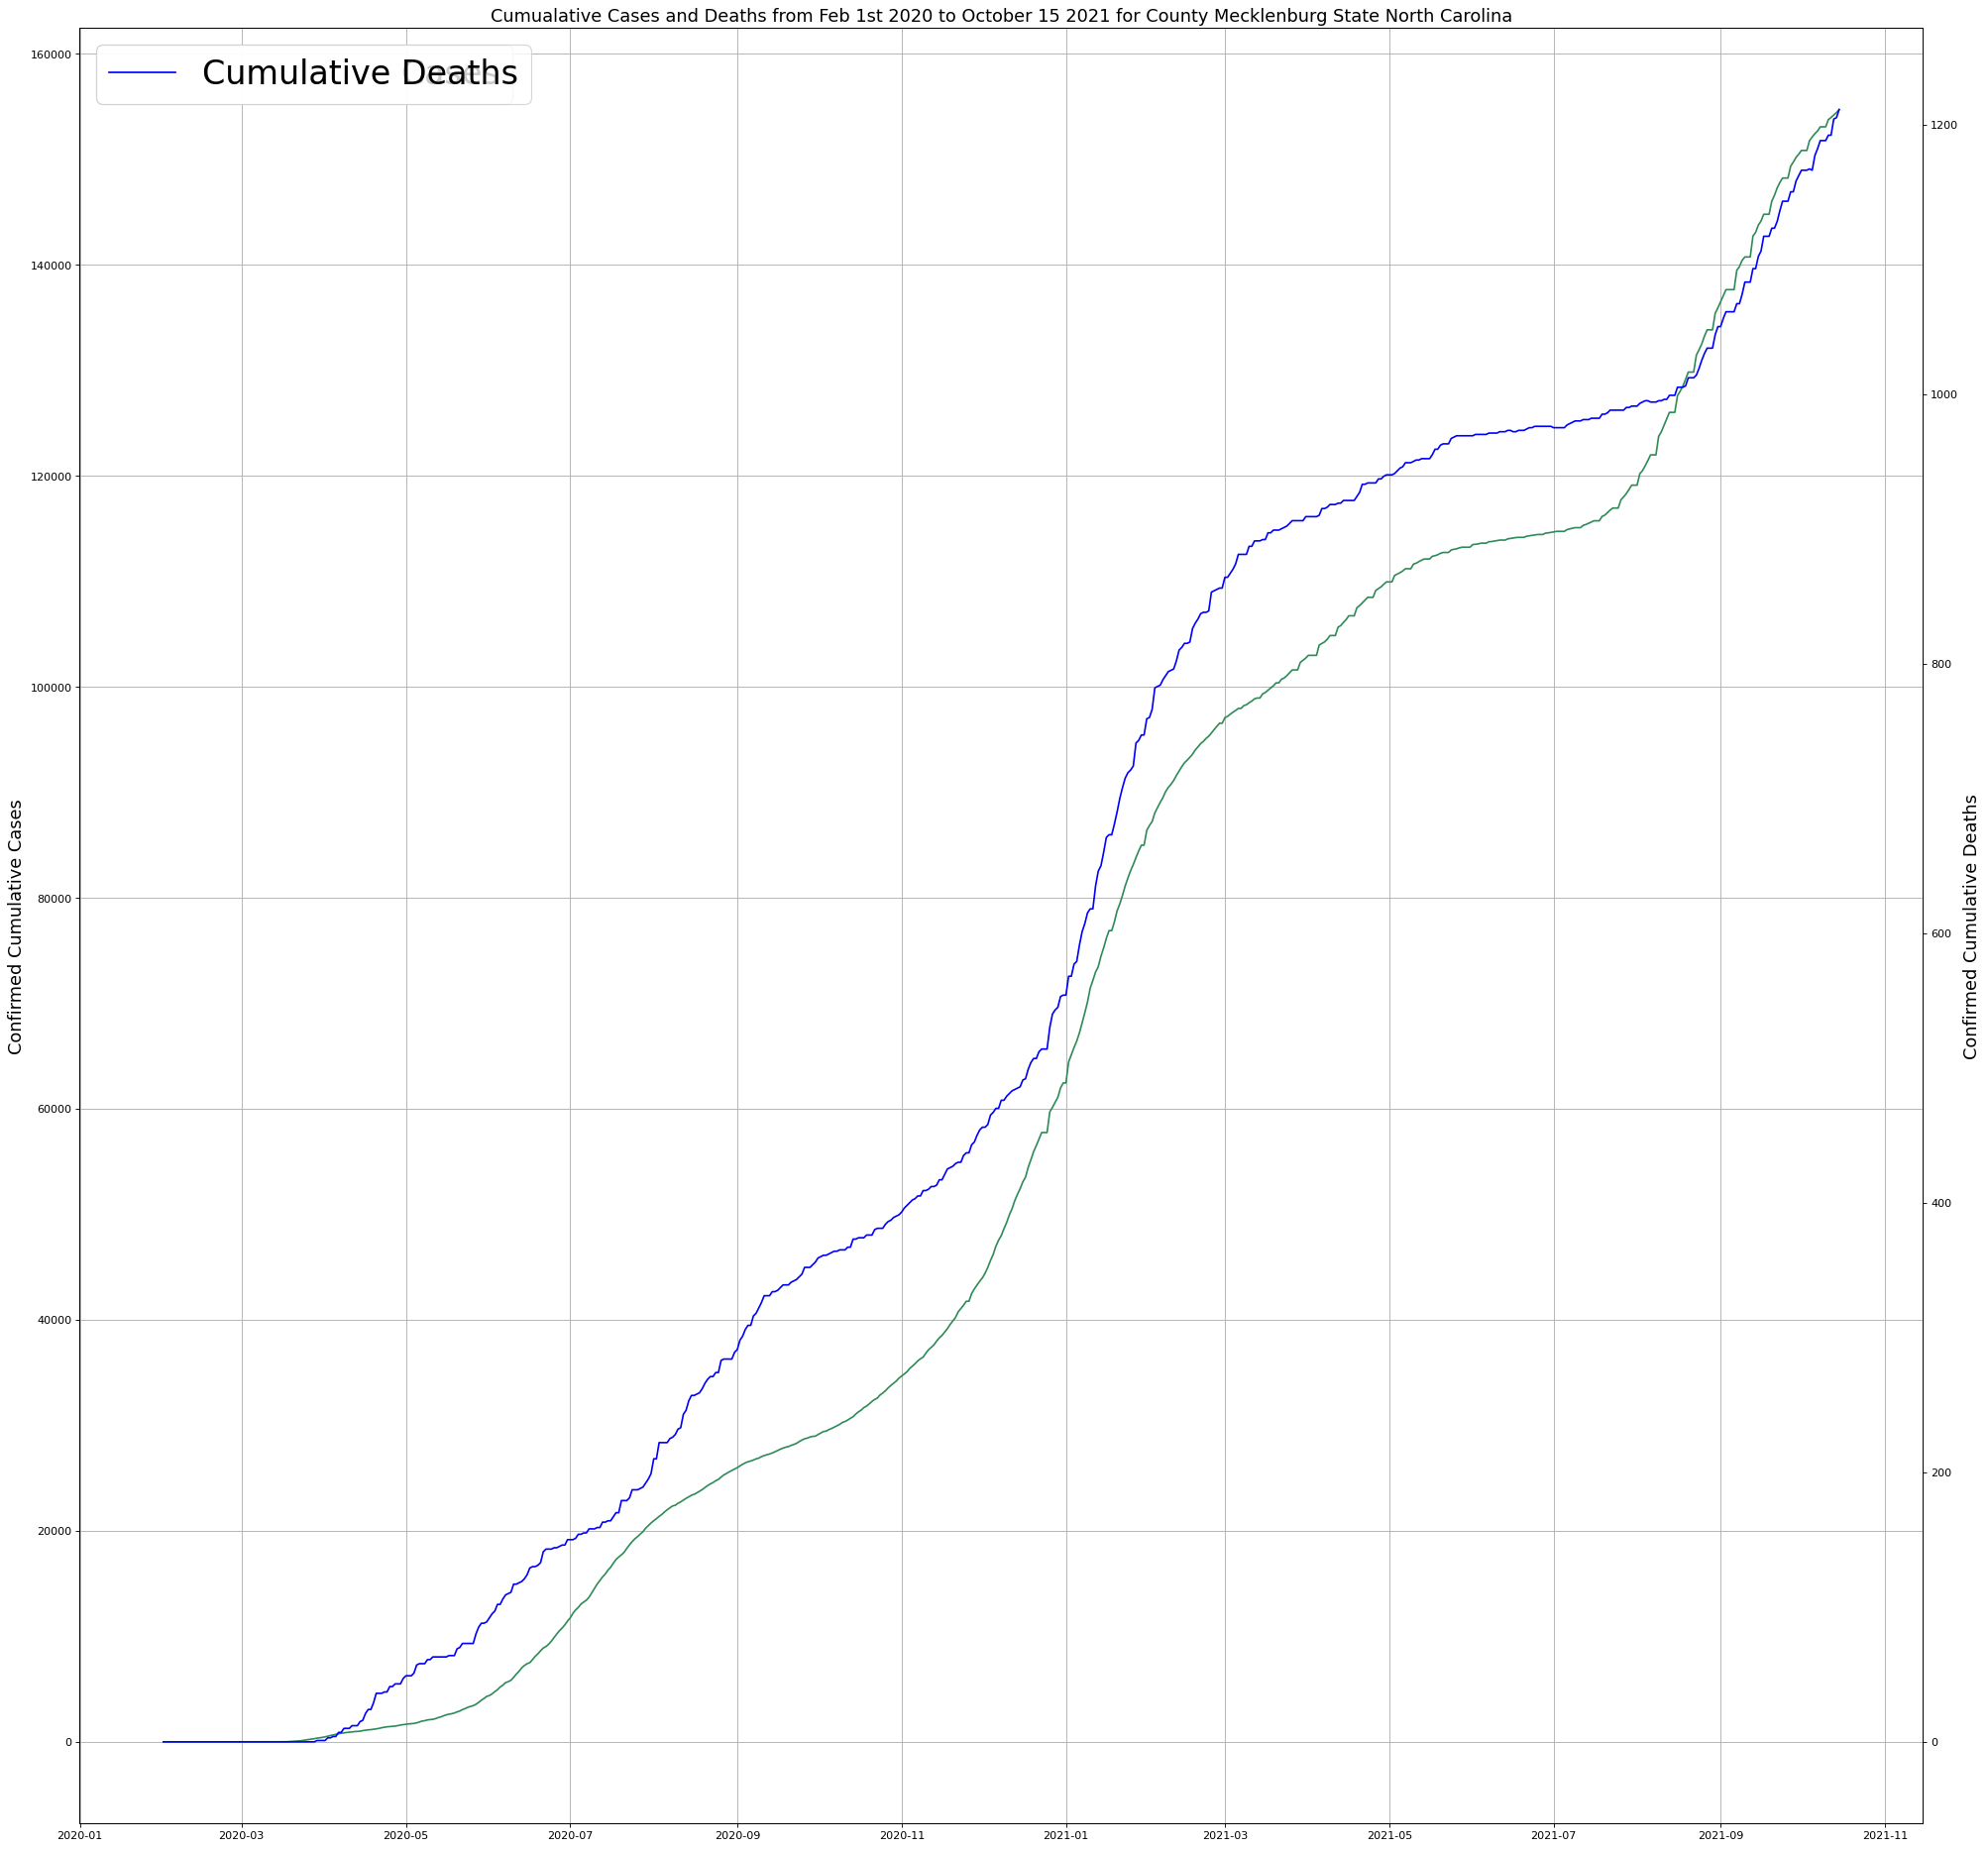

In [141]:
figure(figsize=(30, 30), dpi=80)
plt.grid(True)

ax = plt.gca()
ax2 = plt.twinx()

ax.plot(nc_cases_merged['Date'], nc_cases_merged['Cumulative Cases'], color='seagreen', label='Cumulative Cases')
ax2.plot(nc_cases_merged['Date'], nc_cases_merged['Cumulative Deaths'], color='blue', label='Cumulative Deaths')

plt.xlabel('Date', fontsize=16)
plt.title('Cumualative Cases and Deaths from Feb 1st 2020 to October 15 2021 for County Mecklenburg State North Carolina', fontsize=16)
plt.savefig('Cumulative_Cases_Deaths_Mecklenburg_North_Carolina.jpeg')

ax.legend(loc=2, fontsize = 30)
ax2.legend(loc=2, fontsize = 30)

ax.set_ylabel('Confirmed Cumulative Cases', fontsize=16)
ax2.set_ylabel("Confirmed Cumulative Deaths", fontsize=16)


### Mandates

In [143]:
mask_mandates = pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')
mask_mandates.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [227]:
# since there is no mask mandate for Mecklenburg, we pick mask mandate for NC state
mask_mandates_nc = mask_mandates[(mask_mandates['State_Tribe_Territory'] == STATE_NAME_SHORT)]
mask_mandates_nc['Date'] = pd.to_datetime(mask_mandates_nc['date'])
mask_mandates_nc = mask_mandates_nc[(mask_mandates_nc['Date'] >= '2020-02-01') & (mask_mandates_nc['Date'] <= '2021-10-15')]

# picking Mecklenburg county
mask_mandates_nc = mask_mandates_nc[(mask_mandates['County_Name'] == 'Mecklenburg County')]

#checking masking is yes or no
mask_mandates_nc['Public_Masks'] = mask_mandates_nc[['Face_Masks_Required_in_Public']].replace({"Yes": True, "No": False})

In [228]:
#merged data
merged_final = pd.merge(nc_cases_merged, mask_mandates_nc, how='left', on='Date')

#replace nan with 0
merged_final['Public_Masks']= merged_final['Public_Masks'].fillna(False)

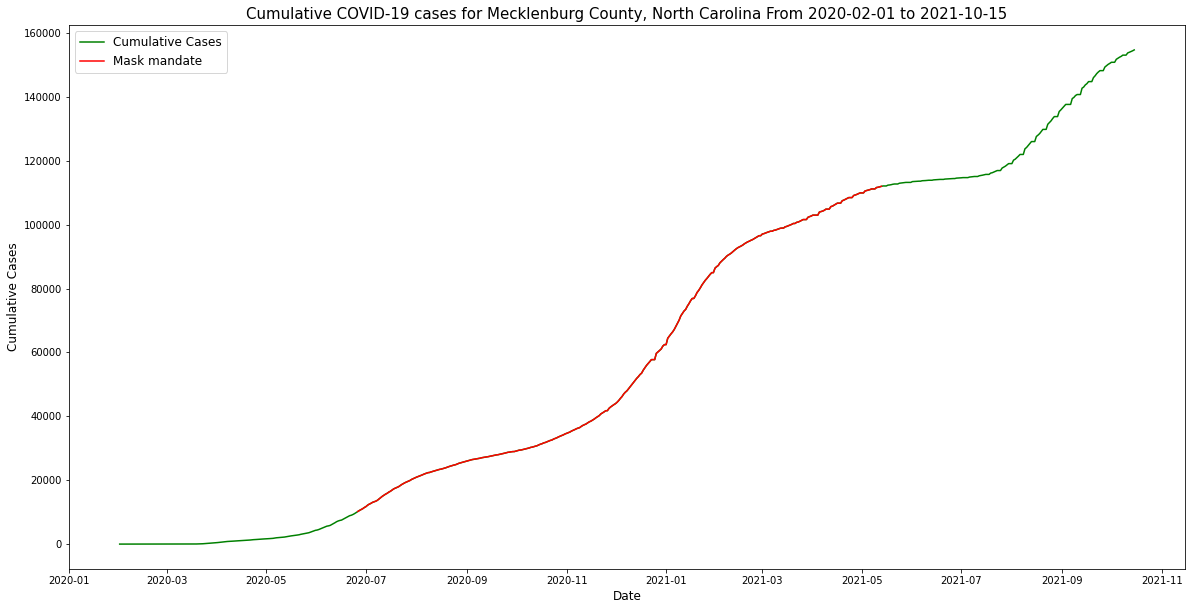

In [266]:
fig = plt.figure(figsize = (20, 10))

plt.plot(merged_final['Date'], merged_final['Cumulative Cases'], label = 'Cumulative Cases', c = 'green')
plt.plot(merged_final.loc[merged_final['Public_Masks'], 'Date'], merged_final.loc[merged_final['Public_Masks'], 'Cumulative Cases'], label = 'Mask mandate', c = 'red')

plt.xlabel('Date', fontsize = 12)
plt.ylabel('Cumulative Cases', fontsize = 12)
plt.title('Cumulative COVID-19 cases for Mecklenburg County, North Carolina From 2020-02-01 to 2021-10-15', fontsize = 15)

plt.legend(fontsize = 12)
plt.savefig("Mecklenburg-County-NC-Cumulative-Cases.jpg")

In [240]:
merged_final

,Date,Cases,Moving Average Cases,Cumulative Cases,Deaths,Moving Average Deaths,Cumulative Deaths,Initial Population,Population at Risk,Rate of Infection,...,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,Public_Masks
0,2020-02-01,0.0,NaN,0.0,0.0,NaN,0.0,1115482,1115482.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2020-02-02,0.0,NaN,0.0,0.0,NaN,0.0,1115482,1115482.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2020-02-03,0.0,NaN,0.0,0.0,NaN,0.0,1115482,1115482.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2020-02-04,0.0,NaN,0.0,0.0,NaN,0.0,1115482,1115482.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2020-02-05,0.0,NaN,0.0,0.0,NaN,0.0,1115482,1115482.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2021-10-11,682.0,285.0,153765.0,4.0,4.0,1192.0,1115482,960525.0,0.029671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
619,2021-10-12,206.0,264.0,153971.0,0.0,4.0,1192.0,1115482,960319.0,0.027491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
620,2021-10-13,235.0,253.0,154206.0,12.0,4.0,1204.0,1115482,960072.0,0.026352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
621,2021-10-14,229.0,248.0,154435.0,1.0,3.0,1205.0,1115482,959842.0,0.025838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


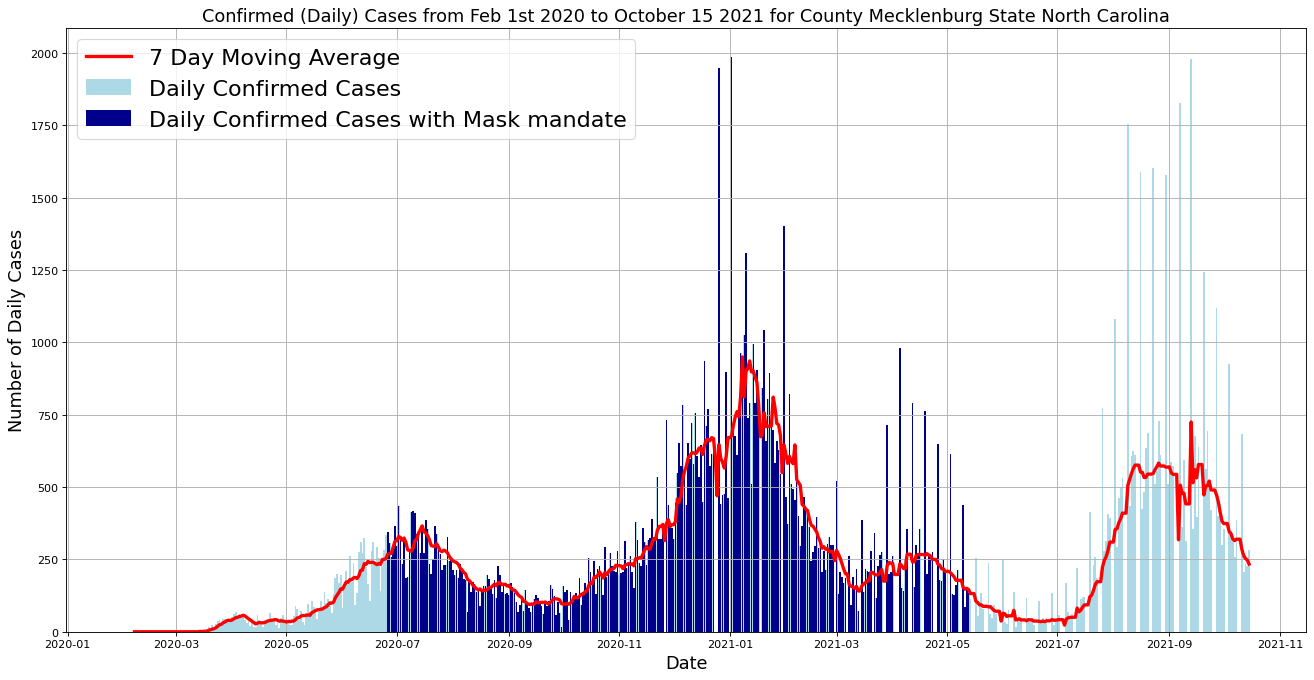

In [268]:
figure(figsize=(20, 10), dpi=80)

plt.grid(True)

#Confirmed Cases
plt.bar(merged_final['Date'], merged_final['Cases'], color='lightblue', label='Daily Confirmed Cases', width=1)

#mask mandate
plt.bar(merged_final.loc[merged_final['Public_Masks'] == True, 'Date'], merged_final.loc[merged_final['Public_Masks'] == True, 'Cases'], label = 'Daily Confirmed Cases with Mask mandate', color = 'darkblue')

#7 day moving average
plt.plot(merged_final['Date'], merged_final['Moving Average Cases'], color='red', label='7 Day Moving Average', linewidth=3)

plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Daily Cases', fontsize=16)
plt.title('Confirmed (Daily) Cases from Feb 1st 2020 to October 15 2021 for County Mecklenburg State North Carolina', fontsize=16)

plt.savefig('Daily_Cases_Mecklenburg_North_Carolina.jpeg')
plt.legend(loc=2, fontsize=20)

plt.savefig("Mecklenburg-County-NC-Daily-Cases.jpg")

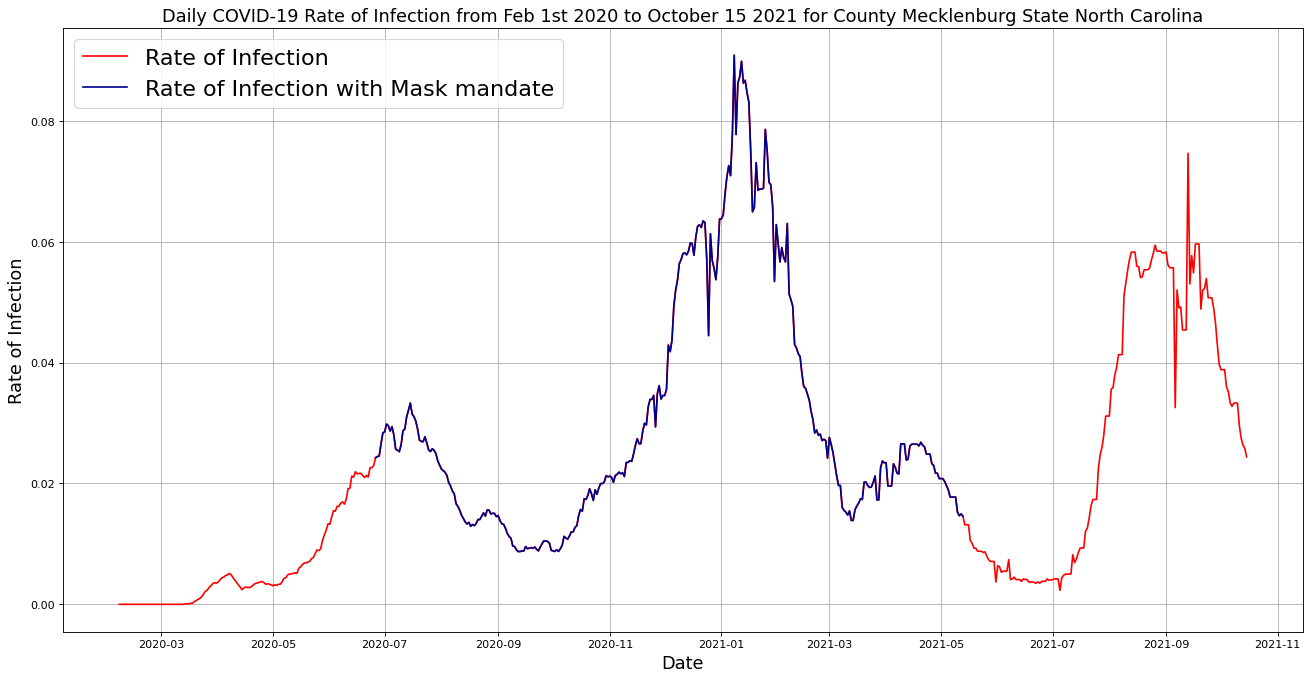

In [269]:
figure(figsize=(20, 10), dpi=80)

plt.grid(True)

#Rate of Infection
plt.plot(merged_final['Date'], merged_final['Rate of Infection'], color='red', label='Rate of Infection')

#mask mandate
plt.plot(merged_final.loc[merged_final['Public_Masks'] == True, 'Date'], merged_final.loc[merged_final['Public_Masks'] == True, 'Rate of Infection'], label = 'Rate of Infection with Mask mandate', color = 'darkblue')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Rate of Infection', fontsize=16)
plt.title('Daily COVID-19 Rate of Infection from Feb 1st 2020 to October 15 2021 for County Mecklenburg State North Carolina', fontsize=16)

plt.legend(loc=2, fontsize=20)
plt.savefig("Mecklenburg-County-NC-Rate-Of-Infection.jpg")